<a href="https://colab.research.google.com/github/RedZeptic/DS-Unit-1-Sprint-2-Data-Wrangling-and-Storytelling/blob/master/module4-sequence-your-narrative/Thomas_Mineo_LS_DS_124_Sequence_your_narrative_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Sequence Your Narrative - Assignment

Today we will create a sequence of visualizations inspired by [Hans Rosling's 200 Countries, 200 Years, 4 Minutes](https://www.youtube.com/watch?v=jbkSRLYSojo).

Using this [data from Gapminder](https://github.com/open-numbers/ddf--gapminder--systema_globalis/):
- [Income Per Person (GDP Per Capital, Inflation Adjusted) by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv)
- [Life Expectancy (in Years) by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv)
- [Population Totals, by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv)
- [Entities](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv)
- [Concepts](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv)

Objectives
- sequence multiple visualizations
- combine qualitative anecdotes with quantitative aggregates

Links
- [Hans Rosling’s TED talks](https://www.ted.com/speakers/hans_rosling)
- [Spiralling global temperatures from 1850-2016](https://twitter.com/ed_hawkins/status/729753441459945474)
- "[The Pudding](https://pudding.cool/) explains ideas debated in culture with visual essays."
- [A Data Point Walks Into a Bar](https://lisacharlotterost.github.io/2016/12/27/datapoint-in-bar/): a thoughtful blog post about emotion and empathy in data storytelling

# ASSIGNMENT
 

1.   Replicate the Lesson Code
2.   Take it further by using the same gapminder dataset to create a sequence of visualizations that combined tell a story of your choosing.

Get creative! Use text annotations to call out specific countries, maybe: change how the points are colored, change the opacity of the points, change their sized, pick a specific time window. Maybe only work with a subset of countries, change fonts, change background colors, etc. make it your own!

In [0]:
# imports
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

#### Look and Load the data

In [0]:
# Replicate the lesson code

# starting with importing the csv's
income = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv')
lifespan = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv')
population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv')
entities = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')
concepts = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv')

In [118]:
income.head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted
0,afg,1800,603
1,afg,1801,603
2,afg,1802,603
3,afg,1803,603
4,afg,1804,603


In [119]:
lifespan.head()

,geo,time,life_expectancy_years
0,abw,1800,34.42
1,abw,1801,34.42
2,abw,1802,34.42
3,abw,1803,34.42
4,abw,1804,34.42


In [120]:
population.head()

,geo,time,population_total
0,afg,1800,3280000
1,afg,1801,3280000
2,afg,1802,3280000
3,afg,1803,3280000
4,afg,1804,3280000


In [121]:
entities.head()

,country,alt_5,alternative_1,alternative_2,alternative_3,alternative_4_cdiac,arb1,arb2,arb3,arb4,arb5,arb6,g77_and_oecd_countries,gapminder_list,god_id,gwid,income_groups,is--country,iso3166_1_alpha2,iso3166_1_alpha3,iso3166_1_numeric,iso3166_2,landlocked,latitude,longitude,main_religion_2008,name,pandg,un_state,unicode_region_subtag,upper_case_name,world_4region,world_6region
0,abkh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Abkhazia,GE-AB,i0,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abkhazia,NaN,False,NaN,NaN,europe,europe_central_asia
1,abw,NaN,NaN,NaN,NaN,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,others,Aruba,AW,i12,high_income,True,AW,ABW,533.0,NaN,coastline,12.50000,-69.96667,christian,Aruba,NaN,False,AW,ARUBA,americas,america
2,afg,NaN,Islamic Republic of Afghanistan,NaN,NaN,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,g77,Afghanistan,AF,i1,low_income,True,AF,AFG,4.0,NaN,landlocked,33.00000,66.00000,muslim,Afghanistan,AFGHANISTAN,True,AF,AFGHANISTAN,asia,south_asia
3,ago,NaN,NaN,NaN,NaN,Angola,NaN,NaN,NaN,NaN,NaN,NaN,g77,Angola,AO,i7,upper_middle_income,True,AO,AGO,24.0,NaN,coastline,-12.50000,18.50000,christian,Angola,ANGOLA,True,AO,ANGOLA,africa,sub_saharan_africa
4,aia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Anguilla,AI,i8,NaN,True,AI,AIA,660.0,NaN,coastline,18.21667,-63.05000,christian,Anguilla,NaN,False,AI,ANGUILLA,americas,america


In [122]:
concepts.head()

,concept,color,concept_type,description,description_long,domain,drill_up,indicator_url,name,name_catalog,name_short,scales,source,source_long,source_url,tags
0,adults_with_hiv_percent_age_15_49,NaN,measure,The estimated percentage of adults aged 15 to ...,NaN,NaN,NaN,NaN,"Adults with HIV (%, age 15-49)","Adults with HIV (%, age 15-49)",Adults with HIV,"[""log"", ""linear""]",NaN,NaN,https://www.gapminder.org/gapminder-world/docu...,hiv
1,age_at_1st_marriage_women,NaN,measure,"The mean age, in years, of first marriage for ...",NaN,NaN,NaN,NaN,Age at 1st marriage (women),Age at 1st marriage (women),Age at 1st marriage,"[""linear"", ""log""]",NaN,NaN,https://www.gapminder.org/data/documentation/g...,population
2,aged_15_24_employment_rate_percent,NaN,measure,"Percentage of total population, age group 15-2...",NaN,NaN,NaN,NaN,Aged 15-24 employment rate (%),Aged 15-24,Employment rate (%),"[""linear"", ""log""]",NaN,NaN,https://www.ilo.org/ilostat/,employment_rate
3,aged_15_24_unemployment_rate_percent,NaN,measure,"Percentage of total population, age group 15-2...",NaN,NaN,NaN,NaN,Aged 15-24 unemployment rate (%),Aged 15-24,Unemployment rate (%),"[""linear"", ""log""]",NaN,NaN,https://www.ilo.org/ilostat/,unemployment
4,aged_15_64_labour_force_participation_rate_per...,NaN,measure,"For age group 15-64, percentage of all labour ...",NaN,NaN,NaN,NaN,Aged 15-64 labour force participation rate (%),Aged 15-64,Labour force participation rate (%),"[""linear"", ""log""]",NaN,NaN,https://www.ilo.org/ilostat/,labour_force_participation


In [0]:
pd.options.display.max_columns = 500
pd.options.display.max_rows = 500

#### Merge the data

In [124]:
print(income.shape)
print(lifespan.shape)

(46513, 3)
(44370, 3)


In [125]:
# merged = pd.merge(income, lifespan)
# ^ is same as below, besides the 'geo' and 'time'
merged = pd.merge(income, lifespan, how='inner', on=['geo','time'])

merged.shape

(40437, 4)

In [126]:
merged = pd.merge(income, lifespan, how='outer', on=['geo','time'])

print(merged.shape)
merged.head()

(50446, 4)


,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years
0,afg,1800,603.0,28.21
1,afg,1801,603.0,28.20
2,afg,1802,603.0,28.19
3,afg,1803,603.0,28.18
4,afg,1804,603.0,28.17


In [127]:
# checking duplicates
merged.duplicated(subset=['geo','time']).value_counts()

False    50446
dtype: int64

In [128]:
# counting num of unique rows in merged['geo'] specific column, could probably 
# put a list of features and be able to see all of them. If this doesnt match 
# the .value_counts() from above then there are duplicated rows
merged['geo'].nunique()

216

In [129]:
# merging income and lifespan into one DataFrame
merged = pd.merge(income, lifespan, how='inner', on=['geo','time'])
print(merged.shape)
merged.head()

(40437, 4)


,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years
0,afg,1800,603,28.21
1,afg,1801,603,28.20
2,afg,1802,603,28.19
3,afg,1803,603,28.18
4,afg,1804,603,28.17


In [130]:
# defining df as the merged output of merged and population.
df = pd.merge(merged, population, how='inner')
print(df.shape)
df.head()

(40437, 5)


,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total
0,afg,1800,603,28.21,3280000
1,afg,1801,603,28.20,3280000
2,afg,1802,603,28.19,3280000
3,afg,1803,603,28.18,3280000
4,afg,1804,603,28.17,3280000


In [131]:
# redefining df as a merged version of itself(left side) and entities(right side) but only certain features from the right.

# left_on='column name' & right_on='column name' are both saying
# "the left dataframe's column is named this... right_on='column name' is saying the same but for the right",
# for merging df's columns with different feature names.

df = pd.merge(df,
              entities[['country','name','world_4region','world_6region']],
              left_on='geo', right_on='country')
print(df.shape)
df.head()

(40437, 9)


,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total,country,name,world_4region,world_6region
0,afg,1800,603,28.21,3280000,afg,Afghanistan,asia,south_asia
1,afg,1801,603,28.20,3280000,afg,Afghanistan,asia,south_asia
2,afg,1802,603,28.19,3280000,afg,Afghanistan,asia,south_asia
3,afg,1803,603,28.18,3280000,afg,Afghanistan,asia,south_asia
4,afg,1804,603,28.17,3280000,afg,Afghanistan,asia,south_asia


In [132]:
# renames columns in a dataframe, old name on left, new name on right.
df = df.rename(columns = {
    'country':'Country code',
    'time':'Year',
    'income_per_person_gdppercapita_ppp_inflation_adjusted':'Income',
    'life_expectancy_years':'Lifespan',
    'population_total':'Population',
    'name':'Country',
    'world_6region':'6 World Regions',
    'world_4region':'4region'
})

df.head()

,geo,Year,Income,Lifespan,Population,Country code,Country,4region,6 World Regions
0,afg,1800,603,28.21,3280000,afg,Afghanistan,asia,south_asia
1,afg,1801,603,28.20,3280000,afg,Afghanistan,asia,south_asia
2,afg,1802,603,28.19,3280000,afg,Afghanistan,asia,south_asia
3,afg,1803,603,28.18,3280000,afg,Afghanistan,asia,south_asia
4,afg,1804,603,28.17,3280000,afg,Afghanistan,asia,south_asia


#### Explore the Data
##### I expand on the work in this section

In [133]:
df.dtypes

geo                 object
Year                 int64
Income               int64
Lifespan           float64
Population           int64
Country code        object
Country             object
4region             object
6 World Regions     object
dtype: object

In [134]:
df.describe()

,Year,Income,Lifespan,Population
count,40437.000000,40437.000000,40437.000000,4.043700e+04
mean,1909.292900,4619.492717,43.132080,1.371204e+07
std,63.308682,10209.571045,16.313228,6.606335e+07
min,1800.000000,247.000000,1.000000,2.128000e+03
25%,1854.000000,876.000000,31.160000,4.113310e+05
50%,1909.000000,1442.000000,35.500000,1.985952e+06
75%,1964.000000,3488.000000,55.970000,6.499707e+06
max,2018.000000,177522.000000,84.170000,1.415046e+09


In [135]:
df.describe(exclude='number')

,geo,Country code,Country,4region,6 World Regions
count,40437,40437,40437,40437,40437
unique,187,187,187,4,6
top,kor,kor,Senegal,africa,europe_central_asia
freq,219,219,219,11826,10778


In [136]:
# going to compare USA and UK from 1800 -> 50% -> 2018 itself, for population, avg gdp / ppp, and lifespan.

# Title will be something like "Does the USA overshadow the UK" 'in economic growth in these years: 1800, 1909, 2018'

usa = df[df.Country == 'United States']

uk = df[df.Country == 'United Kingdom']

usa.shape, uk.shape

((219, 9), (219, 9))

In [137]:
usa.describe(), uk.describe()

(              Year        Income    Lifespan    Population
 count   219.000000    219.000000  219.000000  2.190000e+02
 mean   1909.000000  14572.936073   54.846256  1.163662e+08
 std      63.364028  15066.042247   15.202079  9.738644e+07
 min    1800.000000   2113.000000   31.000000  6.801854e+06
 25%    1854.500000   3512.500000   39.410000  2.752198e+07
 50%    1909.000000   7989.000000   51.780000  9.236198e+07
 75%    1963.500000  20090.500000   70.270000  1.962540e+08
 max    2018.000000  54898.000000   79.140000  3.267667e+08,
               Year        Income    Lifespan    Population
 count   219.000000    219.000000  219.000000  2.190000e+02
 mean   1909.000000  12007.360731   55.770365  3.889438e+07
 std      63.364028  10077.687687   14.794811  1.601237e+07
 min    1800.000000   3193.000000   37.320000  1.232747e+07
 25%    1854.500000   4922.500000   41.720000  2.354315e+07
 50%    1909.000000   8156.000000   50.540000  4.146250e+07
 75%    1963.500000  14850.500000   71.

In [0]:
# converting usa, uk dataframes to only these three year variants.
usa = usa[usa['Year'].isin([1800,1909,2018])]
uk = uk[uk['Year'].isin([1800,1909,2018])]

In [139]:
usa.head()

,geo,Year,Income,Lifespan,Population,Country code,Country,4region,6 World Regions
38028,usa,1800,2127,39.41,6801854,usa,United States,americas,america
38137,usa,1909,8370,52.78,92361978,usa,United States,americas,america
38246,usa,2018,54898,79.14,326766748,usa,United States,americas,america


In [140]:
uk.head()

,geo,Year,Income,Lifespan,Population,Country code,Country,4region,6 World Regions
13015,gbr,1800,3429,38.65,12327466,gbr,United Kingdom,europe,europe_central_asia
13124,gbr,1909,8158,52.48,41462503,gbr,United Kingdom,europe,europe_central_asia
13233,gbr,2018,40079,81.19,66573504,gbr,United Kingdom,europe,europe_central_asia


In [0]:
# seaborn visualization
_1800 = df[df['Year'] == 1800]
_1909 = df[df['Year'] == 1909]
_2018 = df[df['Year'] == 2018]

/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:1479: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_ylim(*args, **kwargs)


Text(0.5, 1.0, 'Year: 1800')

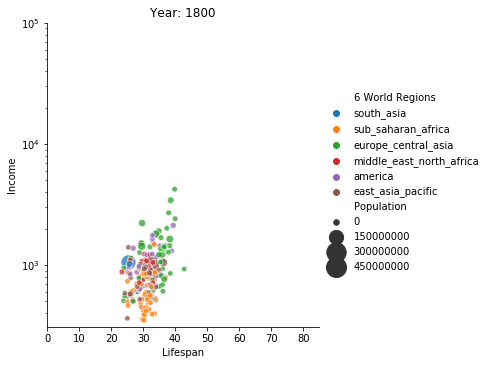

In [142]:
sns.relplot(x='Lifespan', y='Income', hue='6 World Regions', size='Population',
            sizes=(30,400), alpha=0.75, data=_1800)
plt.yscale('log')
plt.ylim(0, 100000)
plt.xlim(0, 85)
plt.title('Year: 1800')

In [143]:
years = [1800, 1909, 2018]
world_df = df[df['Year'].isin(years)]
world_df.head()

,geo,Year,Income,Lifespan,Population,Country code,Country,4region,6 World Regions
0,afg,1800,603,28.21,3280000,afg,Afghanistan,asia,south_asia
109,afg,1909,818,29.72,5317347,afg,Afghanistan,asia,south_asia
218,afg,2018,1867,58.69,36373176,afg,Afghanistan,asia,south_asia
219,ago,1800,618,26.98,1567028,ago,Angola,africa,sub_saharan_africa
328,ago,1909,997,30.31,3234731,ago,Angola,africa,sub_saharan_africa


Text(0.5, 1.0, '2018')

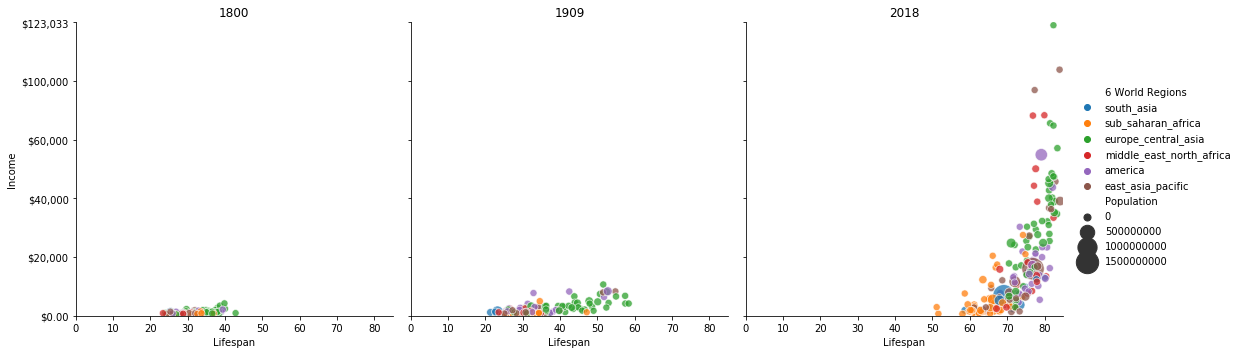

In [144]:
fig = sns.relplot(x='Lifespan', y='Income', hue='6 World Regions', size='Population',
                  sizes=(50, 500), alpha=0.75, col='Year', data=world_df)

axes = fig.axes.flatten()
# plt.yscale('log')
plt.ylim(0, 100000)
plt.xlim(0, 85)

yticklabels = ['$0.00', '$20,000', '$40,000', '$60,000', '$100,000', '$123,033']

#1800
axes[0].set_title('1800')
axes[0].tick_params(axis='y', which='major', )
axes[2].set_yticklabels(yticklabels)

#1909
axes[1].set_title('1909')


#2018
axes[2].set_title('2018')

In [145]:
# pre-setup for the graphs ahead
year1 = [1800]
year2 = [1909]
year3 = [2018]

world_df1 = world_df[df['Year'].isin(year1)]
world_df2 = world_df[df['Year'].isin(year2)]
world_df3 = world_df[df['Year'].isin(year3)]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


In [0]:
_1800_usa = usa[usa['Year'].isin([1800])]
_1909_usa = usa[usa['Year'].isin([1909])]
_2018_usa = usa[usa['Year'].isin([2018])]

_1800_uk = uk[uk['Year'].isin([1800])]
_1909_uk = uk[uk['Year'].isin([1909])]
_2018_uk = uk[uk['Year'].isin([2018])]

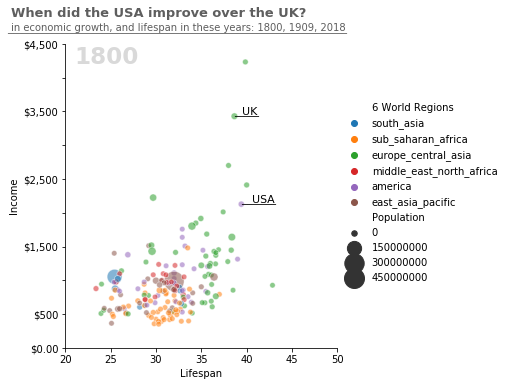

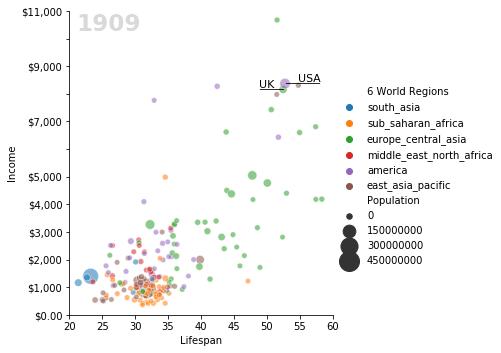

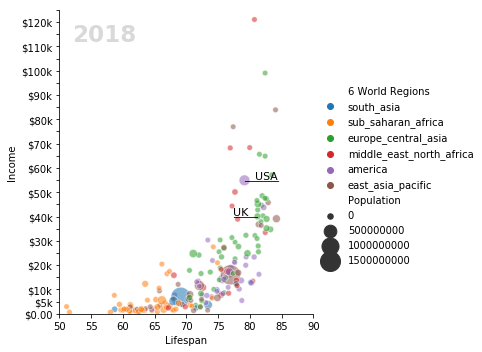

In [242]:
# My "story"/graph section, yes I know this is a lot of code... for me.
# graph 1
ax1 = sns.relplot(x='Lifespan', y='Income', hue='6 World Regions', size='Population',
                 sizes=(30,400), alpha=0.55, data=world_df1)

# ax1 ticks
ax1.set_yticklabels(['$0.00','$500',' ','$1,500',' ','$2,500',' ','$3,500',' ','$4,500'])
plt.ylim(0, 4500)
plt.xlim(20, 50)

# title text for 1800
plt.text(x=14, y=4900, s='When did the USA improve over the UK?', weight='semibold', fontsize=13, color='#5e5e5e')
plt.text(x=14, y=4700, s='in economic growth, and lifespan in these years: 1800, 1909, 2018', weight='normal', fontsize=10, color='#5e5e5e')
plt.text(x=13.6, y=4700, s='____________________________________________________________________', weight='normal', fontsize=10, color='#5e5e5e') # there is most definitly a better way to do this
plt.text(x=21, y=4200, s='1800', weight='bold', fontsize=23, alpha=0.15)
# usa
plt.text(x=_1800_usa.Lifespan+1.2, y=_1800_usa.Income+20, s='USA', fontsize=11);
plt.text(x=_1800_usa.Lifespan, y=_1800_usa.Income+30, s='_______')
# uk
plt.text(x=_1800_uk.Lifespan+0.8, y=_1800_uk.Income+20, s='UK', fontsize=11)
plt.text(x=_1800_uk.Lifespan, y=_1800_uk.Income+30, s='_____');

# graph 2
ax2 = sns.relplot(x='Lifespan', y='Income', hue='6 World Regions', size='Population',
                 sizes=(30,400), alpha=0.55, data=world_df2)

# ax2 ticks
ax2.set_yticklabels(['$0.00','$1,000','$2,000','$3,000','$4,000','$5,000',' ','$7,000',' ','$9,000',' ','$11,000'])
plt.yticks(list(range(0, 12000, 1000)))
plt.ylim(0,11000)
plt.xlim(20,60)

# title text for 1909
plt.text(x=21, y=10300, s='1909', weight='bold', fontsize=23, alpha=0.15)
# usa
plt.text(x=_1909_usa.Lifespan+1.9, y=_1909_usa.Income+70, s='USA', fontsize=11)
plt.text(x=_1909_usa.Lifespan, y=_1909_usa.Income+100, s='_______')
# uk
plt.text(x=_1909_uk.Lifespan-3.7, y=_1909_uk.Income+70, s='UK', fontsize=11)
plt.text(x=_1909_uk.Lifespan-3.7, y=_1909_uk.Income+100, s='_____');

# graph 3
ax3 = sns.relplot(x='Lifespan', y='Income', hue='6 World Regions', size='Population',
                 sizes=(30,400), alpha=0.55, data=world_df3)

# ax3 ticks
ax3.set_yticklabels(['$0.00','$5k','$10k','','$20k','','$30k','','$40k','','$50k','','$60k','','$70k','','$80k','','$90k','','$100k','','$110k','','$120k','','$130k'])
plt.yticks(list(range(0, 130000, 5000)))
plt.ylim(0,125000)
plt.xlim(50,90)

# title text for 1909
plt.text(x=52, y=112000, s='2018', weight='bold', fontsize=23, alpha=0.15)
# usa
plt.text(x=_2018_usa.Lifespan+1.7, y=_2018_usa.Income+660, s='USA', fontsize=11)
plt.text(x=_2018_usa.Lifespan, y=_2018_usa.Income+745, s='_______')
# uk
plt.text(x=_2018_uk.Lifespan-3.8, y=_2018_uk.Income+660, s='UK', fontsize=11)
plt.text(x=_2018_uk.Lifespan-3.8, y=_2018_uk.Income+745, s='_____');

# STRETCH OPTIONS

## 1. Animate!

- [How to Create Animated Graphs in Python](https://towardsdatascience.com/how-to-create-animated-graphs-in-python-bb619cc2dec1)
- Try using [Plotly](https://plot.ly/python/animations/)!
- [The Ultimate Day of Chicago Bikeshare](https://chrisluedtke.github.io/divvy-data.html) (Lambda School Data Science student)
- [Using Phoebe for animations in Google Colab](https://colab.research.google.com/github/phoebe-project/phoebe2-docs/blob/2.1/tutorials/animations.ipynb)

## 2. Study for the Sprint Challenge

- Concatenate DataFrames
- Merge DataFrames
- Reshape data with `pivot_table()` and `.melt()`
- Be able to reproduce a FiveThirtyEight graph using Matplotlib or Seaborn.

## 3. Work on anything related to your portfolio site / Data Storytelling Project

In [0]:
# TODO